## V723 Cas Brightness Temperature Work

In [3]:
#imports
import numpy as np
import pandas as pd
import astropy.units as u
import astropy.constants as const
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#the frequency 

f5 = (	 
[50430, 	5.0,	2.3,	0.5],	

[50473, 	5.0,	2.4,	0.4],	

[50876, 	5.0,	7.0,	0.2],		

[51154, 	5.0,	8.2,	0.5],	

[51601,	5.0,	7.9,	0.4],

[51650,	5.0,	13.5,	0.9],

[51938,	5.0,	6.3,	1.1],
     
[52063,	5.0,	4.0,	0.7],

[52208,	5.0,	5.4,	0.3],
)


In [5]:
#putting it in a dataframne
df5 =  pd.DataFrame(f5, columns = ["MJD",	"Freq (GHz)",	"Flux (mJy)",	"eFlux (mJy)"])


In [7]:
#putting them in easy to call format
#there is no non-detections so I don't need to filter this one
days5 = df5['MJD']-49953
flux5 = df5["Flux (mJy)"]
flux_err5 = np.sqrt(df5["eFlux (mJy)"]**2 + (df5["Flux (mJy)"]*0.05)**2)

### Distance and velocity of the outburst are being taken from the paper "V723 Cas (Nova Cassiopeiae 1995): MERLIN observations from 1996 to 2001"

#### Velocity = 414 km/s (+- 0.1)
#### Distance = 2.39 kpc (+- 0.38)

In [8]:
Dist =   2.39 * 3.086*10**21                 #distance in cm
V_const =  414 * 100000        #velocity in cm/s


def Con_TB(S,T,E,nu): #flux denisty, time, error of flux density, frequency in order those are the plug ins
    R = []
    CTB = []
    CTBE = []
    
    for i in range(len(S)):
        R.append(V_const * T[i])  #velocity over time                  #R in cm
        angular_diam = 206265 * ((2*R[i])/ Dist)                       #unitless
        CTB.append(1765.8 * (nu**(-2)) * S[i]*(angular_diam**(-2)))    #mJy / (Ghz^2)
        CTBE.append(1765.8 * (nu**(-2)) * E[i]*(angular_diam**(-2)))
    
    return(CTB, CTBE)
        

In [9]:
nu0 = 5 #FREQUENCY 1

date_CAC_sec_n0 = days5 * 86400    #time in seconds  (date_CAC is going to be a list of times (from t0))

In [11]:
CTB_nu0, CTBError_nu0 = Con_TB(flux5, date_CAC_sec_n0, flux_err5, nu0)

CTB_nu0

[17837.78751687657,
 15662.261214023962,
 14499.21688794125,
 10031.774146206872,
 5132.897418770666,
 8272.180310058913,
 2821.431012115858,
 1585.4223970231574,
 1873.9179694519069]

### Now to plot it

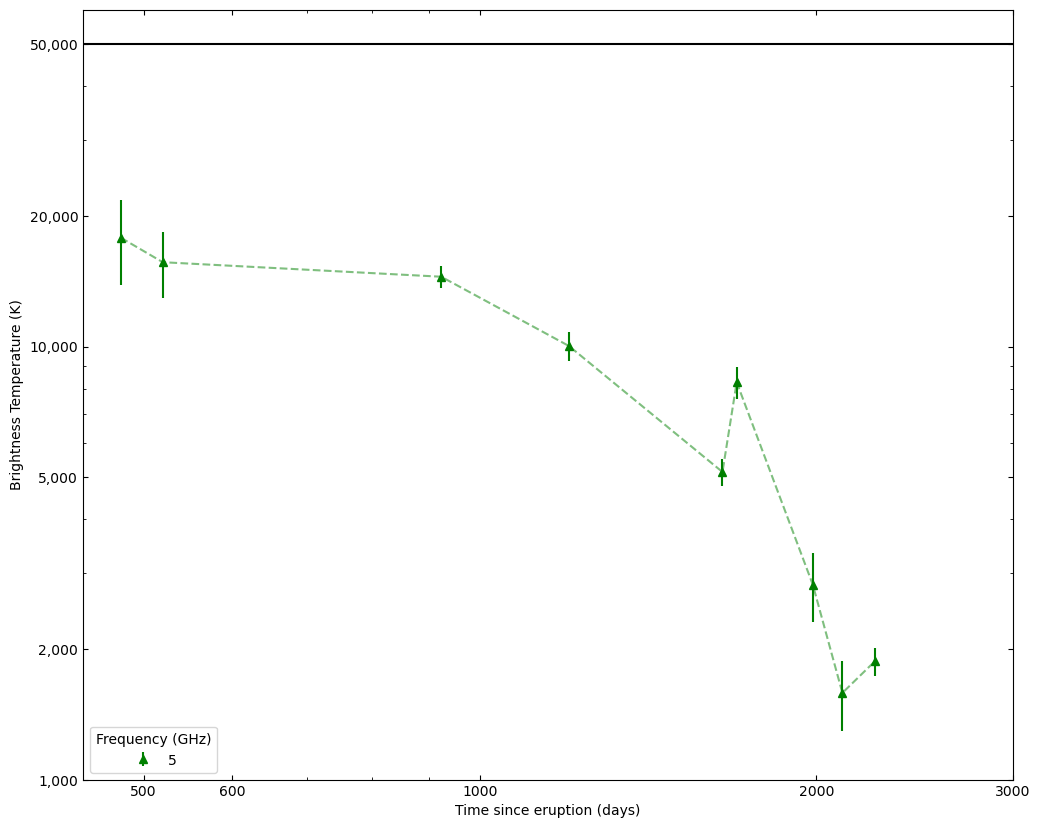

In [21]:
fig, ax = plt.subplots()
fig.set_size_inches(12,10)

ax.axhline(y=5*10**4, color='black', linestyle='-', linewidth=1.5)

ax.errorbar(days5, CTB_nu0, yerr=CTBError_nu0, fmt='^', color='green', label='5')
ax.plot(days5, CTB_nu0, color='green', linestyle = '--', alpha=.50)

ax.set_xscale('log')
ax.set_xticks([500,600,1000,2000,3000], labels = ['500','600','1000','2000','3000'])
ax.set_yscale('log')
ax.set_yticks([1000,2000, 5000, 10000, 20000, 50000], labels = ['1,000', '2,000','5,000','10,000', '20,000', '50,000'])
ax.set_xlabel("Time since eruption (days)")
ax.set_ylabel("Brightness Temperature (K)")


ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)

ax.set_title("")
plt.legend(title='Frequency (GHz)')
plt.show();